In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from nltk import ngrams
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from collections import  Counter
import re

In [33]:
data=pd.read_csv(r'C:\Users\divya\Documents\GitHub\Build_Projects_Open_Avenue\Open_Avenue\EDA\open_ave_data.csv',header=0,index_col=0)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 954 entries, 0 to 986
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ReportText    954 non-null    object
 1   findings      954 non-null    object
 2   clinicaldata  950 non-null    object
 3   ExamName      954 non-null    object
 4   impression    954 non-null    object
dtypes: object(5)
memory usage: 44.7+ KB


In [35]:
data.head()

,ReportText,findings,clinicaldata,ExamName,impression
0,EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/01/2019 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: Cough. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/01/2019 ...,IMPRESSION: Normal 2-view chest radiography.
1,EXAM: CHEST RADIOGRAPHY EXAM DATE: 05/23/2020 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: CHEST PAIN. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 05/23/2020 ...,IMPRESSION: No acute cardiopulmonary abnormali...
2,EXAM: CHEST RADIOGRAPHY EXAM DATE: 12/13/2019 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: CHEST PAIN. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 12/13/2019 ...,IMPRESSION: No acute cardiopulmonary process.
3,Exam: - CHEST-PORTABLE History: Chest pain Com...,Findings: Heart size appears normal. Lungs cle...,History: Chest pain \n\n,Exam: - CHEST-PORTABLE\n\nComparison: None,Impression: Lungs clear
4,EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/17/2021 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,"CLINICAL HISTORY: CHEST PAIN, SHORTNESS OF BRE...",EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/17/2021 ...,IMPRESSION: Normal single view chest.


In [36]:
print("Total no.of records in the dataset: ",data.shape[0])

Total no.of records in the dataset:  954


In [37]:
print("Total no.of records in the dataset: ",data.shape[1])

Total no.of records in the dataset:  5


#### Checking Null values

- All fields contains non-null values except `clinicaldata` field. 
- It has 4 missing values as below and hence those rows are dropped.

In [38]:
data.isnull().sum()

ReportText      0
findings        0
clinicaldata    4
ExamName        0
impression      0
dtype: int64

In [39]:
data[data['clinicaldata'].isnull()]

,ReportText,findings,clinicaldata,ExamName,impression
116,Exam: XR CHEST AP OR PA ONLY COMPARISON: Chest...,FINDINGS: HEART AND MEDIASTINUM: Stable LUNGS ...,NaN,Exam: XR CHEST AP OR PA ONLY\n\nCOMPARISON: Ch...,IMPRESSION: No significant change from prior
356,Exam: CHEST AP or PA ONLY COMPARISON: Chest Xr...,FINDINGS: HEART AND MEDIASTINUM: Stable LUNGS ...,NaN,Exam: CHEST AP or PA ONLY\n\nCOMPARISON: Chest...,IMPRESSION: Persistent vascular congestion and...
651,Exam: XR CHEST AP OR PA ONLY SYMPTOMS: chest p...,FINDINGS: The lungs appear clear. Negative for...,NaN,Exam: XR CHEST AP OR PA ONLY SYMPTOMS: chest p...,IMPRESSION: Negative for active cardiopulmonar...
760,Exam: XR CHEST PA / LAT COMPARISON: [DATE]. FI...,FINDINGS: Coarsened interstitial opacities thr...,NaN,Exam: XR CHEST PA / LAT\n\nCOMPARISON: [DATE].,IMPRESSION: No acute cardiopulmonary disease i...


In [40]:
data[data['clinicaldata'].isnull()].index


Index([116, 356, 651, 760], dtype='int64')

In [41]:
data.shape

(954, 5)

In [42]:
data.dropna(axis=0,inplace=True)

In [43]:
data.shape

(950, 5)

#### Checking duplicates

- There are no duplicate records in this dataset
- But it is observered that there are many repeated values in most of the fields which are like templates followed by radiologists.

In [44]:
data.duplicated().sum()

0

In [45]:

data['ReportText'].duplicated().sum()

0

In [46]:
data.drop("ReportText",axis=1,inplace=True)

In [47]:
data.duplicated().sum()

0

In [48]:

data[data['findings'].duplicated()]['findings']

2      FINDINGS: Lungs/Pleura: No focal opacities evi...
5      FINDINGS: Lungs/Pleura: No focal opacities evi...
8      FINDINGS: Lungs/Pleura: No focal opacities evi...
10     FINDINGS: Lungs/Pleura: No focal opacities evi...
12     FINDINGS: Lungs/Pleura: No focal opacities evi...
                             ...                        
979    FINDINGS: The cardiomediastinal silhouette is ...
980    FINDINGS: Lungs/Pleura: No focal opacities evi...
981    Findings: Heart size appears normal. Lungs cle...
982    LUNGS: The lung fields demonstrate normal degr...
984    FINDINGS: Lungs/Pleura: No focal opacities evi...
Name: findings, Length: 544, dtype: object

In [49]:
data['clinicaldata'].value_counts()

clinicaldata
CLINICAL HISTORY: Chest pain. \n\n                    84
CLINICAL HISTORY: CHEST PAIN. \n\n                    60
CLINICAL HISTORY: Cough. \n\n                         40
CLINICAL HISTORY: Shortness of breath. \n\n           40
HISTORY: Chest Pain \n\n                              28
                                                      ..
Clinical history: R05: Cough. \n\n                     1
CLINICAL INFORMATION: Dyspnea. \n\n                    1
CLINICAL HISTORY: Cough, SOB. \n\n                     1
CLINICAL HISTORY: F/u right pleural effusion. \n\n     1
CLINICAL HISTORY: 68 years Male, SOB \n\n              1
Name: count, Length: 367, dtype: int64

In [50]:
data['ExamName'].value_counts()

ExamName
EXAM: CHEST 2 VIEW\n\nCOMPARISON: None.                                                                                                  35
EXAM: CHEST - 2 VIEW\n\nCOMPARISON: None.                                                                                                18
EXAM: XR CHEST 2 VIEWS\n\nTECHNIQUE: Frontal and lateral chest.\n\nCOMPARISON: None Available.                                           13
Exam: CHEST AP (1 VIEW)\n\nComparison: Yesterday                                                                                         10
Exam: CHEST AP (1 VIEW)\n\nComparison: None                                                                                               9
                                                                                                                                         ..
CHEST TWO VIEWS\n\nCOMPARISON: XR CHEST PA AND LATERAL dated 08/11/2015; CHEST TWO VIEWS dated 06/22/2008                                 1
EXAM: CHEST

In [51]:
data['impression'].value_counts()

impression
IMPRESSION: Normal single view chest.                                                                                                                                       160
IMPRESSION: Normal 2-view chest radiography.                                                                                                                                 93
IMPRESSION: Negative chest. Signed by: [[PERSONALNAME]]                                                                                                                      36
IMPRESSION: No acute cardiopulmonary process.                                                                                                                                26
IMPRESSION: No acute cardiopulmonary abnormality.                                                                                                                            17
                                                                                                             

In [52]:

pd.set_option('display.max_colwidth', None)  
pd.set_option('display.max_rows', None)      
pd.set_option('display.max_columns', None)   

#### Most Repeated Values for each field

In [53]:
dt={}
for col in data.columns:
    dt[col]={}
    most_frequent = data[col].value_counts().index[0]
    freq = data[col].value_counts().iloc[0]
    dt[col]['Most Frequent Value']=most_frequent
    dt[col]['Frequency']=freq

df_freqs=pd.DataFrame(dt).T
df_freqs

,Most Frequent Value,Frequency
findings,"FINDINGS: Lungs/Pleura: No focal opacities evident. No pleural effusion. No pneumothorax. Mediastinum: Within exam limitations, the cardiomediastinal contour is normal. Other: None. \n\n",174
clinicaldata,CLINICAL HISTORY: Chest pain. \n\n,84
ExamName,EXAM: CHEST 2 VIEW\n\nCOMPARISON: None.,35
impression,IMPRESSION: Normal single view chest.,160


In [54]:
pd.reset_option('display.max_colwidth')
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')


#### Most Repeated Values in clinicaldata field

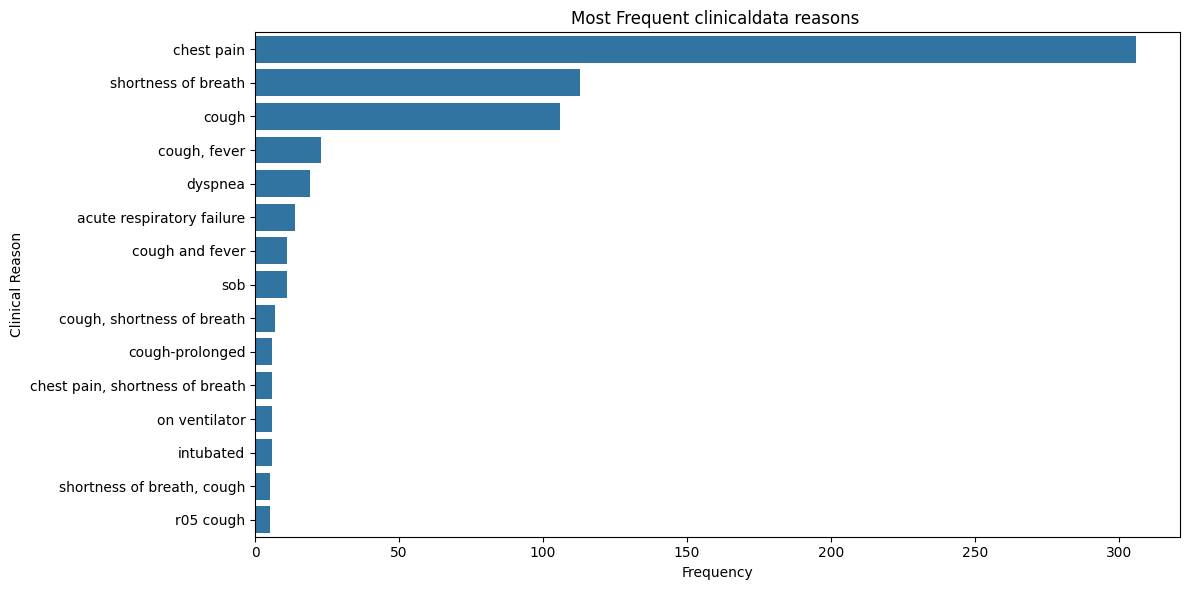

In [55]:
data['clinical_reason'] = data['clinicaldata'].str.split(':').str[-1].str.lower().str.strip()
data['clinical_reason'] = data['clinical_reason'].str.replace('.', '')
reason_counts = data['clinical_reason'].value_counts().head(15)
data.drop("clinical_reason",axis=1,inplace=True)

plt.figure(figsize=(12, 6))
sns.barplot(y=reason_counts.index, x=reason_counts.values)
plt.title("Most Frequent clinicaldata reasons ")
plt.xlabel("Frequency")
plt.ylabel("Clinical Reason")
plt.tight_layout()
plt.show()



#### Analysing text statistics

Text statistics visualizations includes:

- sentence length analysis
- word frequency analysis
- average word length analysis


In [56]:
data.head()

,findings,clinicaldata,ExamName,impression
0,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: Cough. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/01/2019 ...,IMPRESSION: Normal 2-view chest radiography.
1,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: CHEST PAIN. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 05/23/2020 ...,IMPRESSION: No acute cardiopulmonary abnormali...
2,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: CHEST PAIN. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 12/13/2019 ...,IMPRESSION: No acute cardiopulmonary process.
3,Findings: Heart size appears normal. Lungs cle...,History: Chest pain \n\n,Exam: - CHEST-PORTABLE\n\nComparison: None,Impression: Lungs clear
4,FINDINGS: Lungs/Pleura: No focal opacities evi...,"CLINICAL HISTORY: CHEST PAIN, SHORTNESS OF BRE...",EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/17/2021 ...,IMPRESSION: Normal single view chest.


### Sentence level - Text Analysis

In [57]:

d={}
for col in data.columns:
    l=[]
    text=data[col]
    for i in text:
        l.append(len(i))
    d[col]={}
    d[col]["Min Length"]=min(l)
    d[col]["Max Length"]=max(l)
    d[col]["Avg Length"]=(sum(l)/len(l))
    d[col]["Unique Entries"] = data[col].nunique()
    d[col]["Duplicates count"]= data[col].duplicated().sum()
    

df_stats=pd.DataFrame(d).T
df_stats

,Min Length,Max Length,Avg Length,Unique Entries,Duplicates count
findings,34.0,642.0,193.044211,406.0,544.0
clinicaldata,14.0,171.0,37.565263,367.0,583.0
ExamName,17.0,333.0,90.680000,732.0,218.0
impression,19.0,914.0,88.806316,486.0,464.0


#### Sentence length of each field

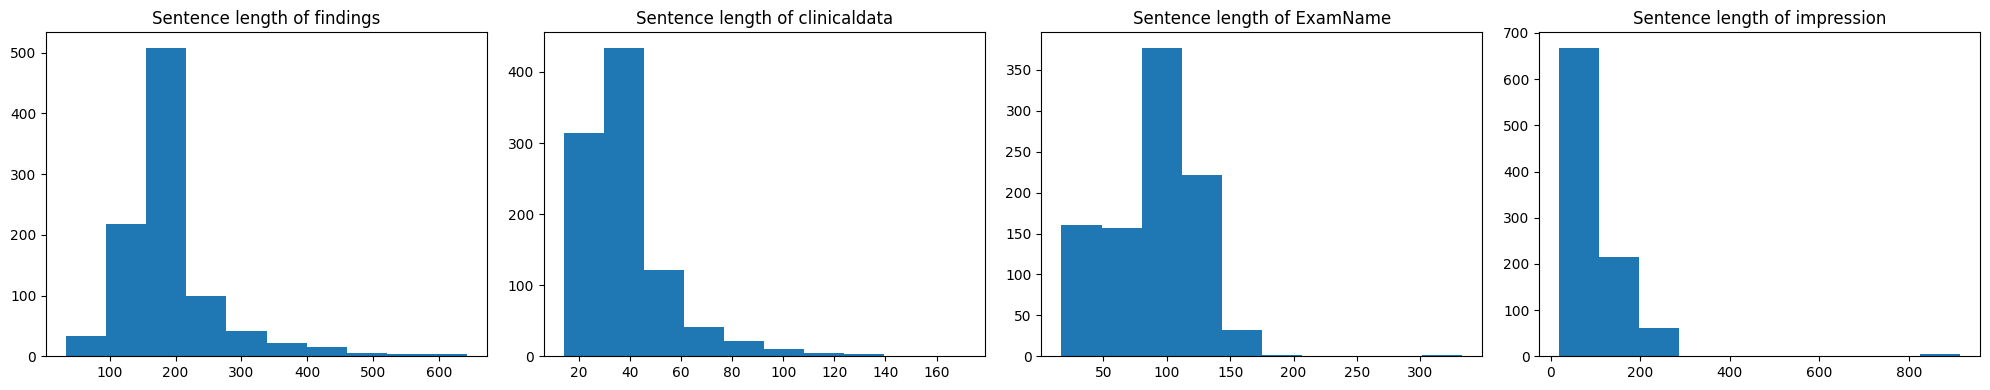

In [58]:
def plot_sentence_length_histogram(ax,text,title):
    text.str.len().hist(ax=ax)
    ax.set_title(f"Sentence length of {title}")
    ax.grid(False)

fig,axes = plt.subplots(nrows=1,ncols=4,figsize=(20,4))

for ax, col in zip(axes,data.columns):
    plot_sentence_length_histogram(ax,data[col],col)

plt.tight_layout()
plt.show()

##### These histograms show the distribution of sentence lengths across five fields in our dataset:

- The `ReportText` field appears to contains the full narrative report, as expected. With most of sentences having length around 350-450 characters.

- Where as `clinicaldata` and `ExamName` fields are much shorter, typically under 100–150 characters, suggesting they contain concise/precise content.

- `impression` shows a highly skewed distribution indicating it has shorter sentence lengths i.e., below 150 characters, but with some longer outliers

- All fields exhibit right-skewed distributions, with mostly shorter sentences and few longer ones.

### Word level - Text Analysis

#### Word count (row-level) for each field in the Dataset

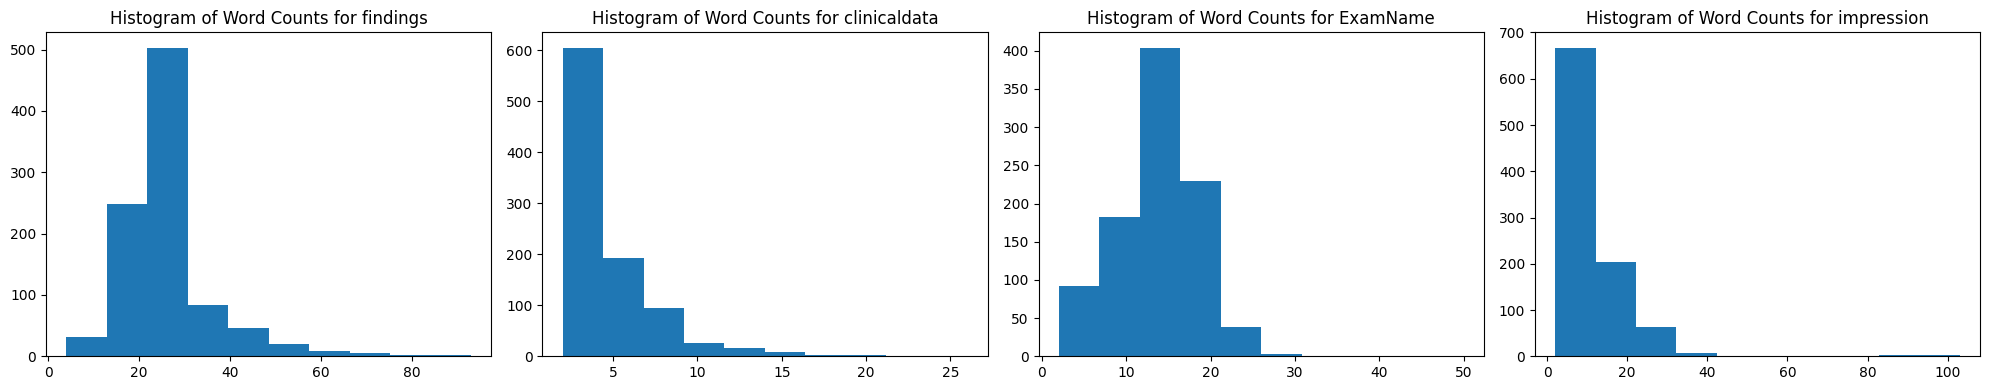

In [59]:
def plot_word_number_histogram(ax,text,title):
    text.str.split().map(lambda x: len(x)).hist(ax=ax)
    ax.set_title(f"Histogram of Word Counts for {title}")
    ax.grid(False)

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))  
for ax, col in zip(axes, data.columns):
    plot_word_number_histogram(ax, data[col], col)

plt.tight_layout()
plt.show()

##### These histograms show the distribution of word count across five fields in our dataset:

- Similar to sentence length obervations, `ReportText` and `findings` contain higher word counts, typically ranging between 20–80 words, indicating more detailed content.

- `clinicaldata` and `ExamName` fields have much lower word counts, mostly under 20 words, suggesting they hold brief or structured inputs where as `impression` is mostly very short.

- Similar to sentence length, here also all fields exhibit right-skewed distributions, with mostly shorter entries with few longer ones.

##### 

#### Average word length (row-level) in each field of the Dataset

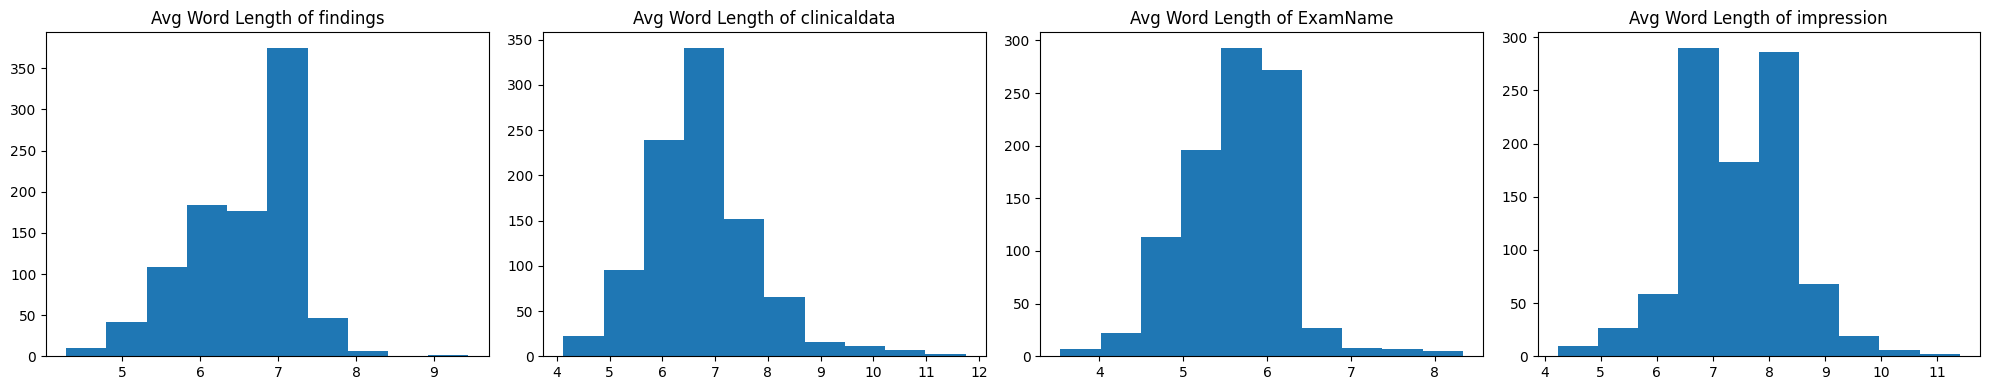

In [60]:
def plot_word_length_histogram(ax,text,title):
    text.str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist(ax=ax)
    ax.set_title(f"Avg Word Length of {title}")
    ax.grid(False)

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))  
for ax,col in zip(axes,data.columns):
    plot_word_length_histogram(ax,data[col],col)

plt.tight_layout()
plt.show()


#### Average word length histograms:

- All fields show average word lengths concentrated between 5 and 8 characters, indicating consistency in vocabulary complexity across fields.
- `clinicaldata` and `impression` show a slightly wider spread, suggesting more variability in the types of words used.
- `ExamName` has slightly shorter average word lengths, likely due to frequent use of standard, concise medical terminology.



#### Bi-gram Analysis

In [61]:

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus = [
        word for sentence in new for word in sentence
        if word.lower() not in stop and not re.search(r'\d', word) 
    ]

    """Removed stopwords and numbers to have better results"""

    
    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(corpus,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

    return corpus

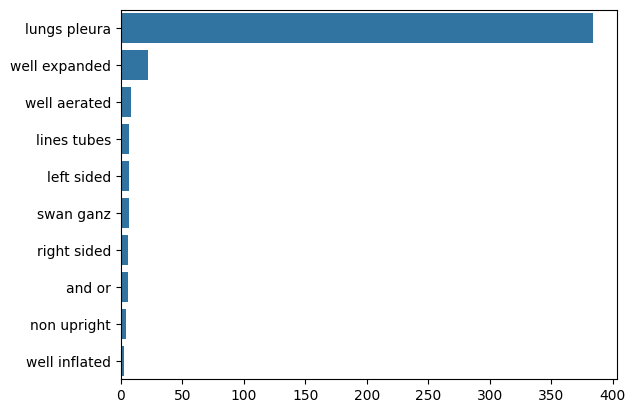

In [62]:
findingsCorpus=plot_top_ngrams_barchart(data['findings'],2)


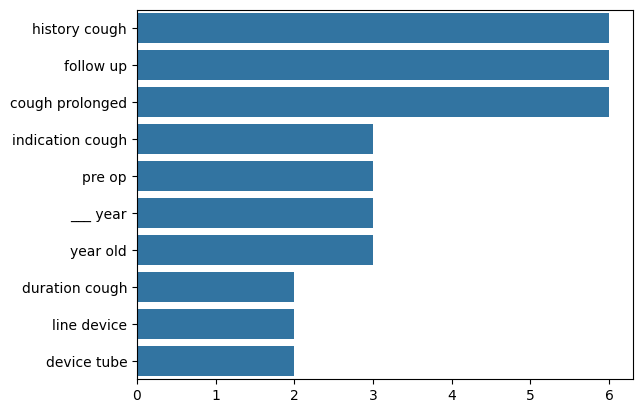

In [63]:
clinicaldataCorpus=plot_top_ngrams_barchart(data['clinicaldata'],2)


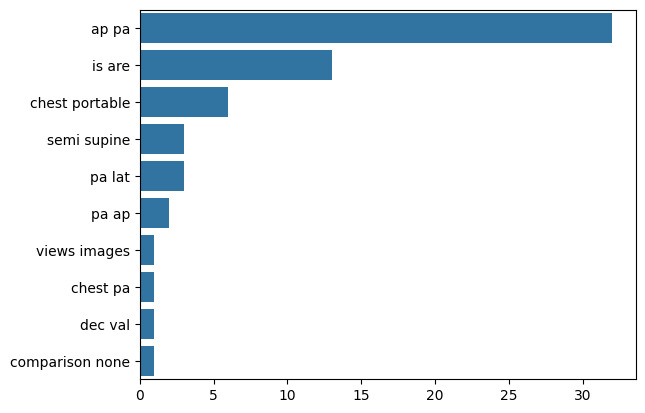

In [64]:
ExamNameCorpus=plot_top_ngrams_barchart(data['ExamName'],2)


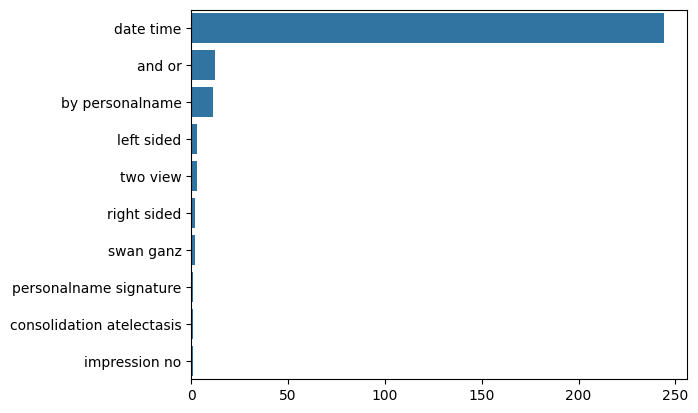

In [65]:
impressionCorpus=plot_top_ngrams_barchart(data['impression'],2)

#### Word Cloud for all fields

In [67]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()



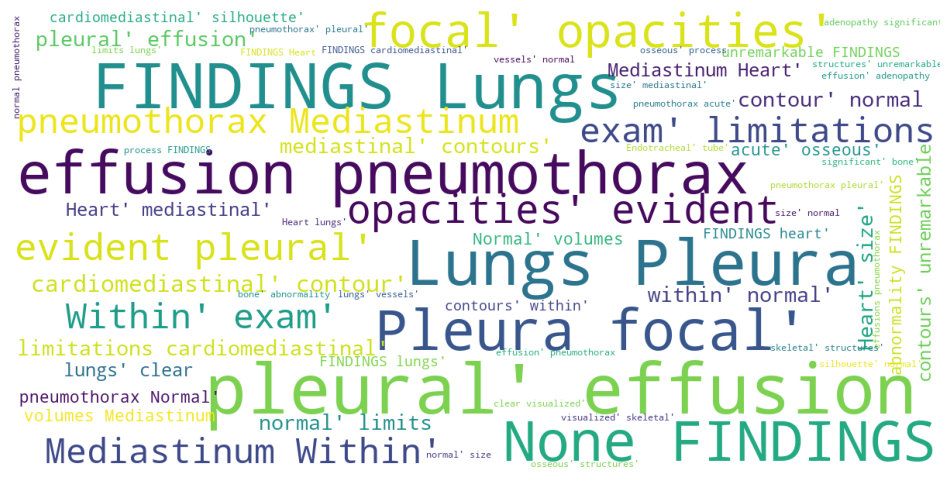

In [68]:
show_wordcloud(findingsCorpus)

-  Findings word cloud highlights terms like "lungs", "pleura", "pneumothorax", "opacity", indicating radiology terms

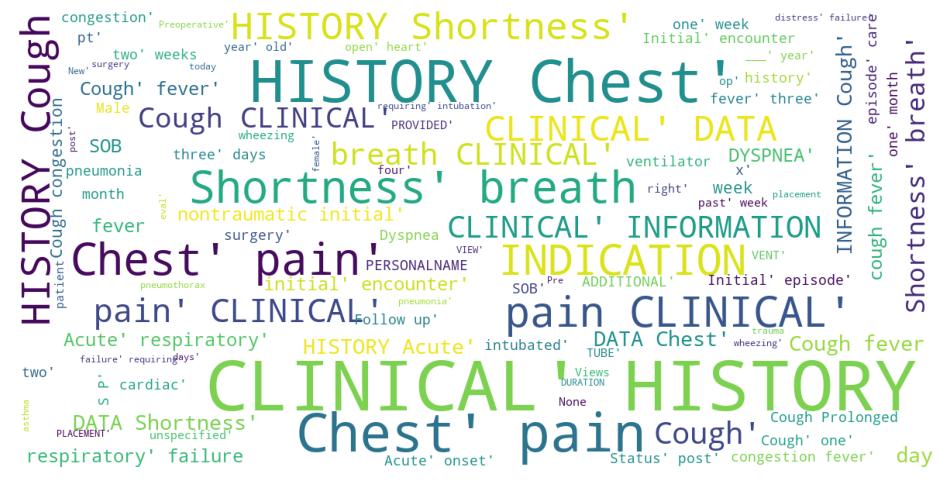

In [69]:
show_wordcloud(clinicaldataCorpus)

- Clinicaldata word cloud shows common symptoms like "chest pain", "shortness of breath", "cough", "History Cough"

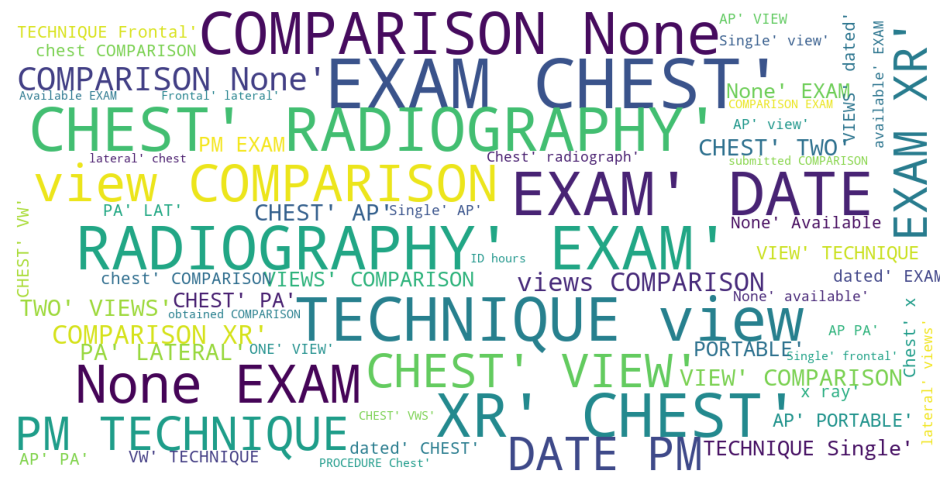

In [70]:
show_wordcloud(ExamNameCorpus)

-  ExamName word cloud emphasizes standard imaging procedures like "XR chest", "radiography exam", "Technique" and dates.

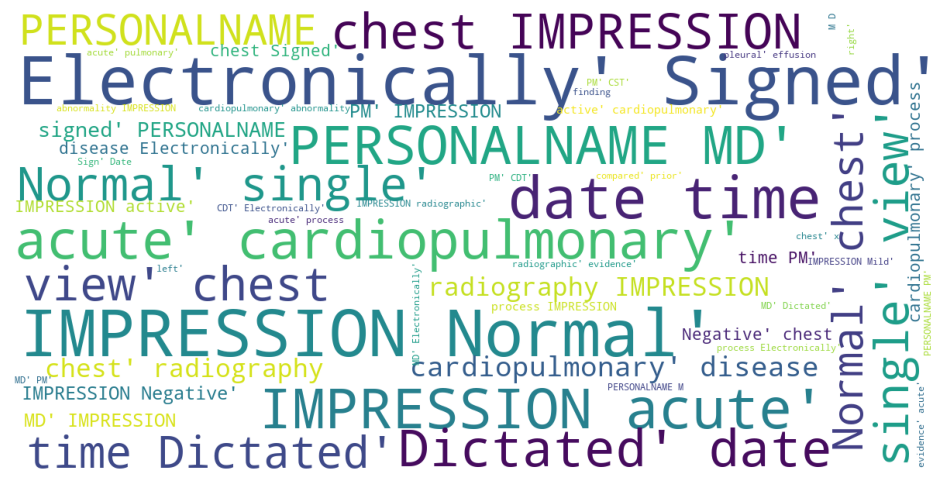

In [71]:
show_wordcloud(impressionCorpus)

- Impressions word cloud shows frequent words such as "normal", "negative", "acute", suggesting common diagnoses.